# DAT210x - Programming with Python for DS

## Module6- Lab1

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
import time
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer

Feel free to adjust and experiment with these parameters after you have completed the lab:

In [0]:
C = 1
kernel = 'linear'

In [0]:
# TODO: Change to 200000 once you get to Question#2
iterations = 5000

# You can set this to false if you want to draw the full square matrix:
FAST_DRAW = True

### Convenience Functions

In [0]:
def drawPlots(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    # You can use this to break any higher-dimensional space down,
    # And view cross sections of it.

    # If this line throws an error, use plt.style.use('ggplot') instead
    mpl.style.use('ggplot') # Look Pretty

    padding = 3
    resolution = 0.5
    max_2d_score = 0
    y_colors = ['#ff0000', '#00ff00', '#0000ff']
    my_cmap  = mpl.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
    colors   = [y_colors[i] for i in y_train]
    num_columns = len(X_train.columns)

    fig = plt.figure()
    fig.canvas.set_window_title(wintitle)
    fig.set_tight_layout(True)
    
    cnt = 0
    for col in range(num_columns):
        for row in range(num_columns):
            
            # Easy out
            if FAST_DRAW and col > row:
                cnt += 1
                continue

            ax = plt.subplot(num_columns, num_columns, cnt + 1)
            plt.xticks(())
            plt.yticks(())

            # Intersection:
            if col == row:
                plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
                cnt += 1
                continue


            # Only select two features to display, then train the model
            X_train_bag = X_train.loc[:, [row,col]]
            X_test_bag = X_test.loc[:, [row,col]]
            model.fit(X_train_bag, y_train)

            # Create a mesh to plot in
            x_min, x_max = X_train_bag.loc[:, 0].min() - padding, X_train_bag.loc[:, 0].max() + padding
            y_min, y_max = X_train_bag.loc[:, 1].min() - padding, X_train_bag.loc[:, 1].max() + padding
            xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                                 np.arange(y_min, y_max, resolution))

            # Plot Boundaries
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())

            # Prepare the contour
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.8)
            plt.scatter(X_train_bag.loc[:, 0], X_train_bag.loc[:, 1], c=colors, alpha=0.5)


            score = round(model.score(X_test_bag, y_test) * 100, 3)
            plt.text(0.5, 0, "Score: {0}".format(score), transform = ax.transAxes, horizontalalignment='center', fontsize=8)
            max_2d_score = score if score > max_2d_score else max_2d_score

            cnt += 1

    print("Max 2D Score: ", max_2d_score)

In [0]:
def benchmark(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    print(wintitle + ' Results')
    s = time.time()
    
    for i in range(iterations):
        model = model.fit(X_train, y_train)
        
        
        
    print("{0} Iterations Training Time: ".format(iterations), time.time() - s)


    s = time.time()
    for i in range(iterations):
        # TODO: score the classifier on the testing data / labels:

        score = model.score(X_test, y_test)
        
    print("{0} Iterations Scoring Time: ".format(iterations), time.time() - s)
    print("High-Dimensionality Score: ", round((score*100), 3))

### The Assignment

Load up the wheat dataset into dataframe `X` and verify you did it properly. Indices shouldn't be doubled, nor should you have any headers with weird characters...

In [0]:
X = pd.read_csv("wheat.data", index_col="id", names=["id","area","perimeter","compactness","length","width","asymmetry","groove","WheatType"])

In [123]:
# An easy way to show which rows have nans in them:
X[pd.isnull(X).any(axis=1)]

,area,perimeter,compactness,length,width,asymmetry,groove,WheatType
id,,,,,,,,
7,14.11,14.1,0.8911,5.42,3.302,2.7,NaN,canadian
35,16.12,15.0,NaN,0.9,NaN,5.709,3.485,canadian
60,11.42,12.86,0.8683,5.008,2.85,2.7,NaN,canadian
135,15.38,14.66,0.899,5.477,3.465,3.6,NaN,canadian
169,11.24,13.0,NaN,0.8359,5.09,2.715,3.521,canadian
170,11.02,13.0,NaN,0.8189,5.325,2.701,6.735,canadian
201,12.67,13.32,0.8977,4.984,3.135,2.3,NaN,canadian


Go ahead and drop any row with a nan:

In [0]:
X.dropna(how="any", axis=0, inplace=True)

In [0]:
names = ["area","perimeter","compactness","length","width","asymmetry","groove"]
for n in names:
  X[n] = pd.to_numeric(X[n], errors="coerce")

In the future, you might try setting the nan values to the mean value of that column, the mean should only be calculated for the specific class rather than across all classes, now that you have the labels.

Copy the labels out of the dataframe into variable `y`, then remove them from `X`.

Encode the labels, using the `.map()` trick we showed you in Module 5, such that `canadian:0`, `kama:1`, and `rosa:2`.

In [0]:
X.drop(labels="id", axis=0, inplace=True)
y = X.WheatType.map({"canadian":0, "kama":1, "rosa":2})
X.drop(labels="WheatType", axis=1, inplace=True)

Split your data into a `test` and `train` set. Your `test` size should be 30% with `random_state` 7. Please use variable names: `X_train`, `X_test`, `y_train`, and `y_test`:

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [0]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

Create an SVC classifier named `svc` and use a linear kernel. You already have `C` defined at the top of the lab, so just set `C=C`.

In [138]:
svc = SVC(kernel=kernel)
SVC(C=C, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel=kernel,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Create an KNeighbors classifier named `knn` and set the neighbor count to `5`:

In [0]:
# Instantiate the KNN model, then fit it do the data.
knn = KNeighborsClassifier(n_neighbors=5)



### Fire it Up:

KNeighbors Results
5000 Iterations Training Time:  1.3600342273712158
5000 Iterations Scoring Time:  3.351889133453369
High-Dimensionality Score:  83.607


KeyError: ignored

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


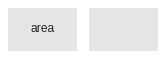

In [140]:
benchmark(knn, X_train, X_test, y_train, y_test, 'KNeighbors')
drawPlots(knn, X_train, X_test, y_train, y_test, 'KNeighbors')

In [78]:
benchmark(svc, X_train, X_test, y_train, y_test, 'SVC')


SVC Results
5000 Iterations Training Time:  3.6678407192230225
5000 Iterations Scoring Time:  1.3791072368621826
High-Dimensionality Score:  49.18


AttributeError: ignored

TypeError: ignored

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


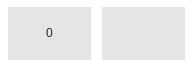

In [113]:
drawPlots(svc, X_train, X_test, y_train, y_test, 'SVC')
plt.show()

### Bonus:

After submitting your answers, mess around with the gamma, kernel, and C values.

SyntaxError: ignored